In [ ]:
#library
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import files

### Exploratory data


In [ ]:
cust_interactions = pd.read_csv("/content/customer_interactions.csv")
product_details = pd.read_csv("/content/product_details.csv",sep=';')
purchase_hist = pd.read_csv("/content/purchase_history.csv",sep=';')

In [ ]:
cust_interactions

,customer_id,page_views,time_spent
0,1,25,120
1,2,20,90
2,3,30,150
3,4,15,80
4,5,22,110


In [ ]:
# Drop Table
product_details = product_details.drop('Unnamed: 4', axis=1)
product_details = product_details.drop('Unnamed: 5', axis=1)
product_details = product_details.drop('Unnamed: 6', axis=1)

In [ ]:
product_details

,product_id,category,price,ratings
0,101,Electronics,500,4.5
1,102,Clothing,50,3.8
2,103,Home & Kitchen,200,4.2
3,104,Beauty,30,4.0
4,105,Electronics,800,4.8


In [ ]:
# Drop Table
purchase_hist = purchase_hist.drop('Unnamed: 3', axis=1)
purchase_hist = purchase_hist.drop('Unnamed: 4', axis=1)
purchase_hist = purchase_hist.drop('Unnamed: 5', axis=1)
purchase_hist = purchase_hist.drop('Unnamed: 6', axis=1)

In [ ]:
purchase_hist

,customer_id,product_id,purchase_date
0,1,101,2023-01-01
1,1,105,2023-01-05
2,2,102,2023-01-02
3,3,103,2023-01-03
4,4,104,2023-01-04
5,5,101,2023-01-05


### Preprocessing

In [ ]:
#checking missing values
product_details.isnull().sum()
purchase_hist.isnull().sum()
cust_interactions.isnull().sum()

customer_id    0
page_views     0
time_spent     0
dtype: int64

In [ ]:

df1 = df.select_dtypes(['int','float'])
df1.drop('SeniorCitizen', axis =1)


### EDA

#### Merged Data

In [ ]:
merged_data = pd.merge(cust_interactions, purchase_hist, on='customer_id', how='inner')
merged_data = pd.merge(merged_data, product_details, on='product_id', how='inner')

In [ ]:
merged_data

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings
0,1,25,120,101,2023-01-01,Electronics,500,4.5
1,5,22,110,101,2023-01-05,Electronics,500,4.5
2,1,25,120,105,2023-01-05,Electronics,800,4.8
3,2,20,90,102,2023-01-02,Clothing,50,3.8
4,3,30,150,103,2023-01-03,Home & Kitchen,200,4.2
5,4,15,80,104,2023-01-04,Beauty,30,4.0


In [ ]:
merged_data.to_csv('merged_data.csv')

Electronics       3
Clothing          1
Home & Kitchen    1
Beauty            1
Name: category, dtype: int64


<Axes: xlabel='category', ylabel='count'>

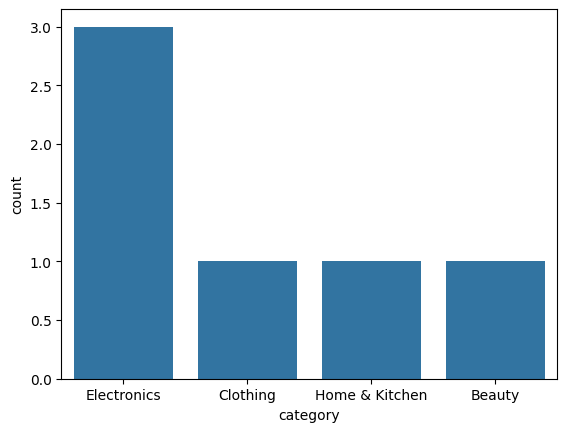

In [ ]:
print(merged_data['category'].value_counts())
sns.countplot(data=merged_data , x ='category')

In [ ]:
merged_data.mean(numeric_only=True)

customer_id      2.666667
page_views      22.833333
time_spent     111.666667
product_id     102.666667
price          346.666667
ratings          4.300000
dtype: float64

In [ ]:
merged_data.groupby(['category'])['price','ratings'].mean()

<ipython-input-61-70dc6bba26c9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged_data.groupby(['category'])['price','ratings'].mean()


,price,ratings
category,,
Beauty,30.0,4.0
Clothing,50.0,3.8
Electronics,600.0,4.6
Home & Kitchen,200.0,4.2


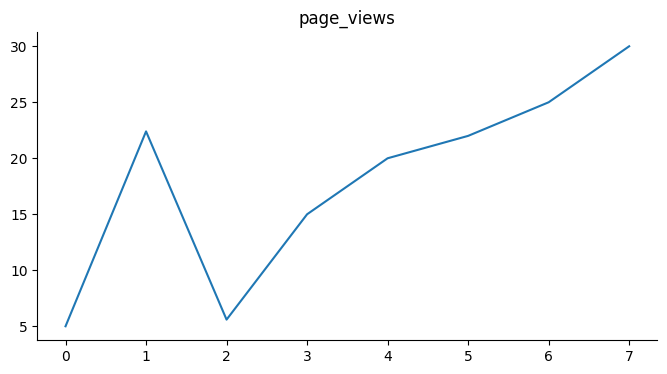

In [ ]:
from matplotlib import pyplot as plt
cust_interactions['page_views'].plot(kind='line', figsize=(8, 4), title='page_views')
plt.gca().spines[['top', 'right']].set_visible(False)

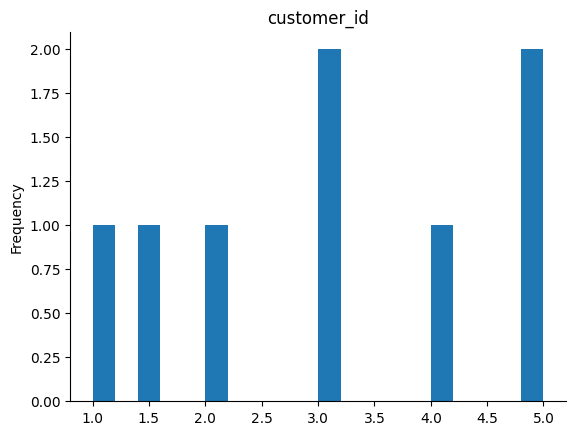

In [ ]:
from matplotlib import pyplot as plt
cust_interactions['customer_id'].plot(kind='hist', bins=20, title='customer_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

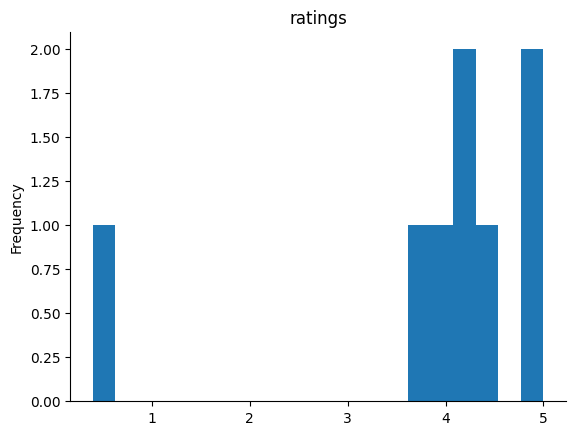

In [ ]:
from matplotlib import pyplot as plt
product_details['ratings'].plot(kind='hist', bins=20, title='ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)